In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
AMPLITUDE_COEFF = 0.01 #0.0075 
num_points = 50

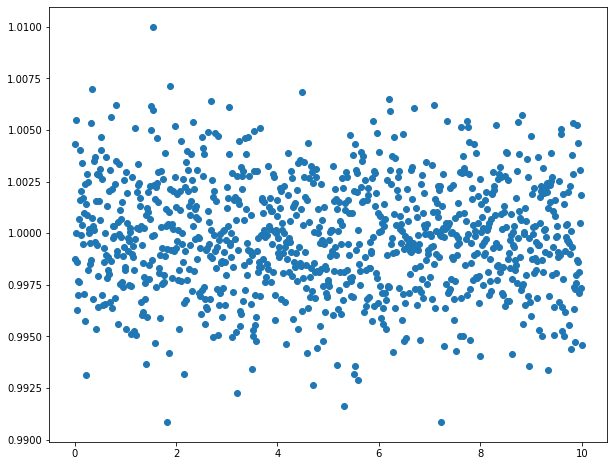

In [157]:
val = np.random.normal(1, 0.002796118344042057, 1000)
t = np.linspace(0, 10, 1000)
plt.figure(figsize=(10,8))
plt.scatter(t, val)

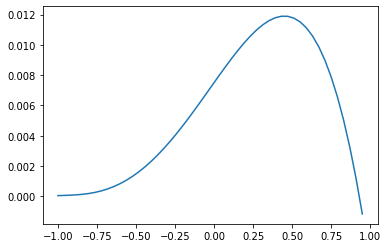

In [158]:
x = np.linspace(-1, 0.95, num_points)
coeffs = np.array([1, 1.941, -0.175, -2.246, -1.125])
y = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x]) * 0.0075 
plt.plot(x, y)
plt.show()

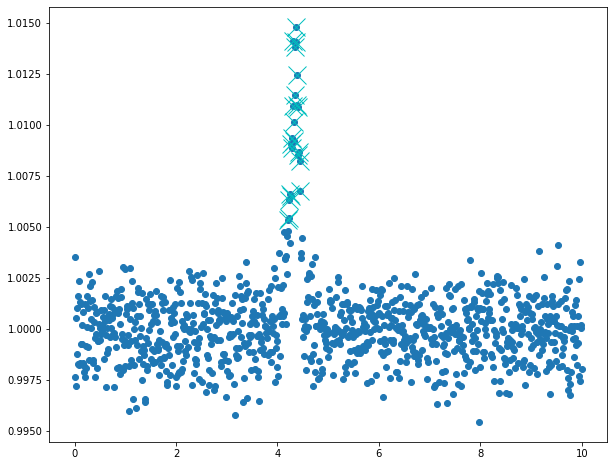

In [159]:
val = np.random.normal(1, 0.0015, 1000)
val[400:400+num_points] += y
t = np.linspace(0, 10, 1000)
# plt.figure(figsize=(10,8))
# plt.scatter(t, val)

f_std = np.std(val)
f_med = np.median(val)
outlier_f = []
outlier_t = []
for nt, nf in zip(t, val):
    if nf > f_med + 2.5 * f_std:
        outlier_f.append(nf)
        outlier_t.append(nt)

# print(f_std)
# print(f_med)

plt.figure(figsize=(10,8))
plt.scatter(t, val)
plt.plot(outlier_t, outlier_f, "cx", markersize=18, label="Outlier Data")

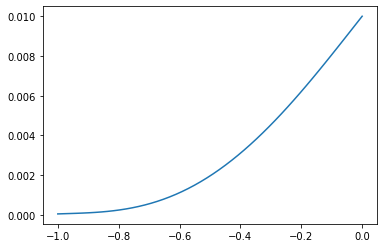

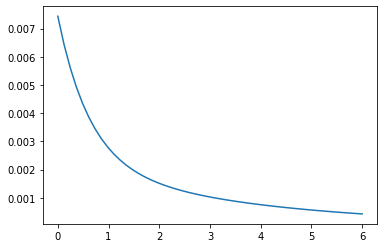

In [160]:
x_rise = np.linspace(-1, 0, num_points)
coeffs = np.array([1, 1.941, -0.175, -2.246, -1.125])
y_rise = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_rise]) * AMPLITUDE_COEFF
plt.plot(x_rise, y_rise)
plt.show()

x_decay = np.linspace(0, 6, num_points)
c_coeffs = [0.6890, 0.3030]
e_coeffs = [-1.600, -0.2783]
coeffs = [[0.6890, -1.600], [0.3030, -0.2783]]
y_decay = np.array([np.sum(np.array([coeffs[i][0]*np.exp(coeffs[i][1]*j) for i in range(len(coeffs))])) for j in x_decay]) * 0.0075 
plt.plot(x_decay, y_decay)
plt.show()

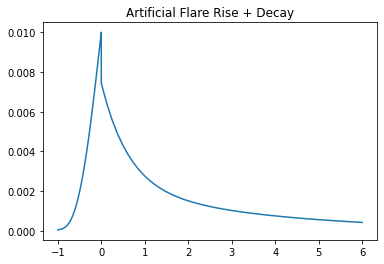

In [161]:
x = np.append(x_rise, x_decay)
y = np.append(y_rise, y_decay)
plt.plot(x, y)
plt.title("Artificial Flare Rise + Decay")
plt.show()

Text(0.5, 1.0, 'Artificial normal data + injected flare, outliers using simple 2.5 std rule')

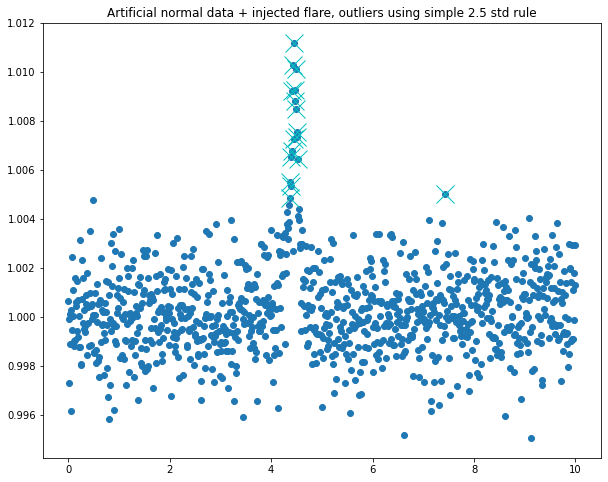

In [162]:
val = np.random.normal(1, 0.0015, 1000)
val[400:400+num_points*2] += y
t = np.linspace(0, 10, 1000)

f_std = np.std(val)
f_med = np.median(val)
outlier_f = []
outlier_t = []
for nt, nf in zip(t, val):
    if nf > f_med + 2.5 * f_std:
        outlier_f.append(nf)
        outlier_t.append(nt)

plt.figure(figsize=(10,8))
plt.scatter(t, val)
plt.plot(outlier_t, outlier_f, "cx", markersize=18, label="Outlier Data")
plt.title("Artificial normal data + injected flare, outliers using simple 2.5 std rule")

In [183]:
from lib.Functions import ReadTxtData
headers, values = ReadTxtData('data', 'TRAPPIST1Data')
t = values[450:-100, 0]
val = values[:, 450:-100, 1]

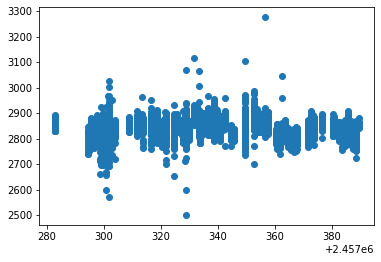

In [191]:
plt.scatter(t[450:-100], val[450:-100])

Text(0.5, 1.0, 'Artificial normal data + injected flare, outliers using simple 2.5 std rule')

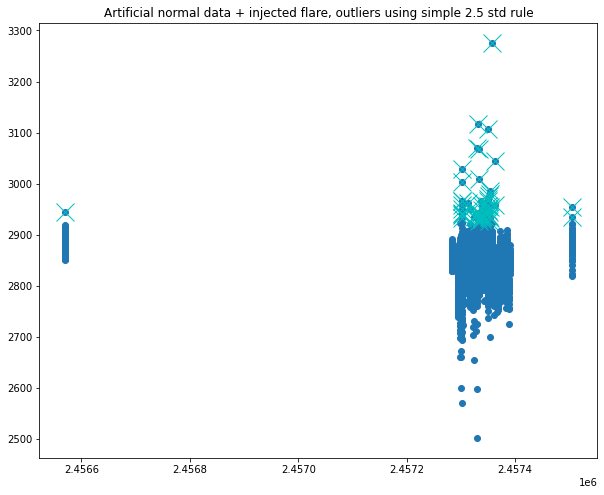

In [182]:
f_std = np.std(val)
f_med = np.median(val)
outlier_f = []
outlier_t = []
for nt, nf in zip(t, val):
    if nf > f_med + 2.5 * f_std:
        outlier_f.append(nf)
        outlier_t.append(nt)

plt.figure(figsize=(10,8))
plt.scatter(t, val)
plt.plot(outlier_t, outlier_f, "cx", markersize=18, label="Outlier Data")
plt.title("Artificial normal data + injected flare, outliers using simple 2.5 std rule")